# Balancing Target Classes

**Author**: Stephanie Golob

**contact**: estefaniagolob@gmail.com

**Date**: July 4, 2022

**Previous Notebook**: 3 of 7 (Exploratory Data Analysis)

**Current Notebook**: 4 of 7

**Next Notebook**: 5 of 7 (Logistic Regression)

---

In this notebook I will explore using different methods to balance the classes of 'Dep_Delay_classes' so that there is no bias towards the majority class when fitting different models. I have decided to compare the results of Upsampling using the RandomOverSampler method, Downsampling using the RandomUnderSampler method and Upsampling using the SMOTEN method, all from the Imbalanced Learn library. After balancing the data I will run simple Logistic Regression models to test whether balancing the data has improved model precision and recall. 

**RandomOverSampler** randomly samples with replacement from the minority classes to balance the data.

**RandomUnderSampler** randomly samples a subset of the data from the majority class to balance the data.

**SMOTE** (Synthetic Minority Oversampling Technique - SMOTE) generates new samples of the minority classes through interpolation.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Balancing-Target-Classes" data-toc-modified-id="Balancing-Target-Classes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Balancing Target Classes</a></span><ul class="toc-item"><li><span><a href="#Upsampling-with-SMOTE" data-toc-modified-id="Upsampling-with-SMOTE-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Upsampling with SMOTE</a></span></li><li><span><a href="#Upsampling-with-RandomOverSampler" data-toc-modified-id="Upsampling-with-RandomOverSampler-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Upsampling with RandomOverSampler</a></span></li><li><span><a href="#Downsampling-with-RandomUnderSampler" data-toc-modified-id="Downsampling-with-RandomUnderSampler-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Downsampling with RandomUnderSampler</a></span><ul class="toc-item"><li><span><a href="#Save-balanced-data-sets" data-toc-modified-id="Save-balanced-data-sets-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Save balanced data sets</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Upsampled-Data-Using-Random-Over-Sampler" data-toc-modified-id="Upsampled-Data-Using-Random-Over-Sampler-1.4.0.1"><span class="toc-item-num">1.4.0.1&nbsp;&nbsp;</span>Upsampled Data Using Random Over Sampler</a></span></li><li><span><a href="#Downsampled-Data-Using-Random-Under-Sampler" data-toc-modified-id="Downsampled-Data-Using-Random-Under-Sampler-1.4.0.2"><span class="toc-item-num">1.4.0.2&nbsp;&nbsp;</span>Downsampled Data Using Random Under Sampler</a></span></li><li><span><a href="#Upsampled-Data-Using-SMOTE" data-toc-modified-id="Upsampled-Data-Using-SMOTE-1.4.0.3"><span class="toc-item-num">1.4.0.3&nbsp;&nbsp;</span>Upsampled Data Using SMOTE</a></span></li></ul></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></li></ul></div>

---

Install Imbalanced Learn library using pip install:

In [1]:
!pip install imbalanced-learn

Read in the required libraries. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#split the data for SMOTEN sampling
from sklearn.model_selection import train_test_split

# count the target classes
from collections import Counter

# sampling techniques
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

Read in the training and validation data sets that were created in Notebook 3 (EDA).

In [2]:
X_train = pd.read_pickle("data/X_train.pkl")
y_train = pd.read_pickle("data/y_train.pkl")

X_validation = pd.read_pickle("data/X_validation.pkl")
y_validation = pd.read_pickle("data/y_validation.pkl")

Check the shape of the data sets.

In [3]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((304062, 26), (304062,), (130313, 26), (130313,))

---

## Upsampling with SMOTE

In [4]:
print(f"Original class counts: {Counter(y_train)}")

Original class counts: Counter({'0': 227138, '1': 76924})


In [5]:
# instantiate SMOTE, random_state = 10 makes the results reproducible
sampler = SMOTE(random_state = 10)

# Upsample X_train1 and y_train1 and save the outputs
X_train_smote, y_train_smote = sampler.fit_resample(X_train, y_train)

Print the counts for each class after upsampling. 

In [6]:
print(f"Class counts after resampling: {Counter(y_train_smote)}")

Class counts after resampling: Counter({'0': 227138, '1': 227138})


---

## Upsampling with RandomOverSampler

In [7]:
# print the original class balance
print(f"Original class counts: {Counter(y_train)}")

Original class counts: Counter({'0': 227138, '1': 76924})


In [8]:
# instantiate RandomOverSampler use random_state = 10 to make the results reproducible
ros = RandomOverSampler(random_state = 10)

# fit on X_train and y_train data and save the outputs 
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)

In [9]:
# print the class balance after upsampling
print(f"Class counts after resampling {Counter(y_train_over)}")

Class counts after resampling Counter({'0': 227138, '1': 227138})


---

## Downsampling with RandomUnderSampler

In [10]:
# print the original class balance
print(f"Original class counts: {Counter(y_train)}")

Original class counts: Counter({'0': 227138, '1': 76924})


In [11]:
# instantiate RandomUnderSampler use random_state = 10 to make the results reproducible
rus = RandomUnderSampler(random_state = 10, replacement = True)

# fit on the X_train and y_train data and save the outputs
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

In [12]:
# print the class balance after down sampling
print(f"Class counts after resampling {Counter(y_train_under)}")

Class counts after resampling Counter({'0': 76924, '1': 76924})


---

### Save balanced data sets

Save the new balanced data sets using `to_pickle` so they can be used in modeling notebooks.

In [13]:
X_train_smote.to_pickle("data/X_train_smote.pkl")
y_train_smote.to_pickle("data/y_train_smote.pkl")

X_train_over.to_pickle("data/X_train_over.pkl")
y_train_over.to_pickle("data/y_train_over.pkl")

X_train_under.to_pickle("data/X_train_under.pkl")
y_train_under.to_pickle("data/y_train_under.pkl")

---

## Logistic Regression

I will fit basic Logistic Regression models on the original data as well as the balanced data sets to compare the sampling methods. I will use precision, recall and f1-scores to evaluate the sampling methods since the models will be making predictions on imbalanced data sets. These metrics will allow me to understand how the model is predicting each class. I want to have higher recall scores for class 1 since I am trying to predict departure delays.

#### Upsampled Data Using Random Over Sampler

Confusion matrices: 



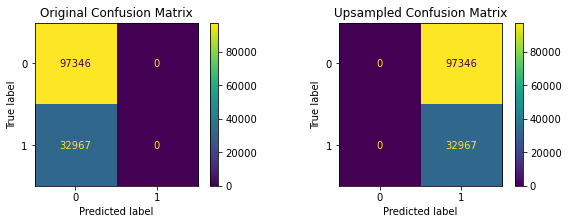


Original data classification report: 
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     97346
           1       0.00      0.00      0.00     32967

    accuracy                           0.75    130313
   macro avg       0.37      0.50      0.43    130313
weighted avg       0.56      0.75      0.64    130313


Upsampled data classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     97346
           1       0.25      1.00      0.40     32967

    accuracy                           0.25    130313
   macro avg       0.13      0.50      0.20    130313
weighted avg       0.06      0.25      0.10    130313



In [14]:
# MODELING 

### ORIGINAL DATA ###
# instantiate the model
LR_model_1 = LogisticRegression(solver = 'lbfgs', random_state = 10, max_iter = 10000)

# fit the model on the original X_train and y_train data
LR_model_1.fit(X_train, y_train)

# make predictions using original X_validation data
y_predictions = LR_model_1.predict(X_validation)

# create a classification report using y_validation and y_predictions
report_original = classification_report(y_validation, y_predictions)




### UPSAMPLED DATA ###
# instantiate the model
LR_model_2 = LogisticRegression(solver = 'lbfgs', random_state = 10, max_iter = 10000)

# fit the model on the upsampled X_train_over and y_train_over data
LR_model_2.fit(X_train_over, y_train_over)

# make predictions using original X_validation data
y_predictions_up = LR_model_2.predict(X_validation) 

# classification report
report_up = classification_report(y_validation, y_predictions_up)





# RESULTS

print_line = "\n=======================================================\n"

# Confusion matrices
print("Confusion matrices:", print_line)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Model on the original data
plot_confusion_matrix(LR_model_1, X_validation, y_validation, ax=axes[0])
axes[0].set_title('Original Confusion Matrix')

# Model on the upsampled data
plot_confusion_matrix(LR_model_2, X_validation, y_validation, ax=axes[1])
axes[1].set_title('Upsampled Confusion Matrix')

plt.show()

# Classification Reports
print("\nOriginal data classification report:", print_line, report_original)
print("\nUpsampled data classification report:", print_line, report_up)

The Logistic Regression (LR) model that was fit on the original data (LR_model_1) only predicted the majority class (Class 0 - on-time flights). The LR model fit on the upsampled data (LR_model_2) only predicted Class 1 (delayed flights). Since this was only a basic LR model, tuning the hyperparameters and exploring other more powerful models should help improve the precision and recall scores.

---

#### Downsampled Data Using Random Under Sampler

Confusion matrices: 



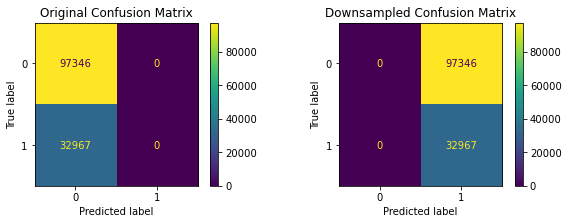


Original data classification report: 
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     97346
           1       0.00      0.00      0.00     32967

    accuracy                           0.75    130313
   macro avg       0.37      0.50      0.43    130313
weighted avg       0.56      0.75      0.64    130313


Downsampled data classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     97346
           1       0.25      1.00      0.40     32967

    accuracy                           0.25    130313
   macro avg       0.13      0.50      0.20    130313
weighted avg       0.06      0.25      0.10    130313



In [15]:
# Modeling

### DOWNSAMPLED DATA ###
# instantiate the model
LR_model_4 = LogisticRegression(solver = 'lbfgs', random_state = 10, max_iter = 10000)

# fit the model on the downsampled X_train_down and y_train_down data
LR_model_4.fit(X_train_under, y_train_under)

# make predictions using original X_validation data
y_predictions_down = LR_model_4.predict(X_validation) 

# create a classification report using y_validation and y_predictions_down
report_down = classification_report(y_validation, y_predictions_down)





# RESULTS

print_line = "\n=======================================================\n"

# Confusion matrices
print("Confusion matrices:", print_line)

fig, axes = plt.subplots(1, 2, figsize = (10, 3))

# Model on the original data
plot_confusion_matrix(LR_model_1, X_validation, y_validation, ax=axes[0])
axes[0].set_title('Original Confusion Matrix')

# Model on the downsampled data
plot_confusion_matrix(LR_model_4, X_validation, y_validation, ax=axes[1])
axes[1].set_title('Downsampled Confusion Matrix')

plt.show()

# Classification Reports
print("\nOriginal data classification report:", print_line, report_original)
print("\nDownsampled data classification report:", print_line, report_down)

The downsampled LR model performs the same as the upsampled LR model.

#### Upsampled Data Using SMOTE

Confusion matrices: 



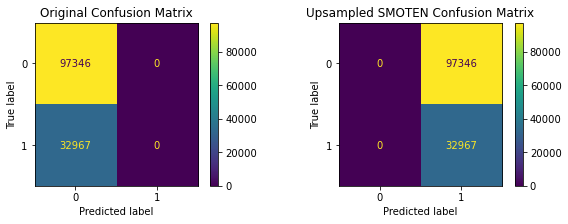


Original data classification report: 
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     97346
           1       0.00      0.00      0.00     32967

    accuracy                           0.75    130313
   macro avg       0.37      0.50      0.43    130313
weighted avg       0.56      0.75      0.64    130313


Upsampled SMOTE data classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     97346
           1       0.25      1.00      0.40     32967

    accuracy                           0.25    130313
   macro avg       0.13      0.50      0.20    130313
weighted avg       0.06      0.25      0.10    130313



In [16]:
# MODELING

### SMOTE UPSAMPLED DATA ###
# instantiate the model
LR_model_6 = LogisticRegression(solver = 'lbfgs', random_state = 10, max_iter = 10000)

# fit the model on the SMOTE upsampled X_train_smote and y_train_smote data
LR_model_6.fit(X_train_smote, y_train_smote)

# make predictions using original X_validation data
y_predictions_smote = LR_model_6.predict(X_validation) 

# create a classification report using y_validation and y_predictions_smote
report_smote = classification_report(y_validation, y_predictions_smote)




# RESULTS 

print_line = "\n=======================================================\n"

# Confusion matrices
print("Confusion matrices:", print_line)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Model on the original data
plot_confusion_matrix(LR_model_1, X_validation, y_validation, ax=axes[0])
axes[0].set_title('Original Confusion Matrix')

# Model on the upsampled data
plot_confusion_matrix(LR_model_6, X_validation, y_validation, ax=axes[1])
axes[1].set_title('Upsampled SMOTEN Confusion Matrix')

plt.show()

# Classification Reports
print("\nOriginal data classification report:", print_line, report_original)
print("\nUpsampled SMOTE data classification report:", print_line, report_smote)

The SMOTE model performs the same as the downsampled and upsampled models, therefore hyperparameter tuning will be needed to see which data set ultimately performs the best.

----

## Results

Comparing the results side-by-side.

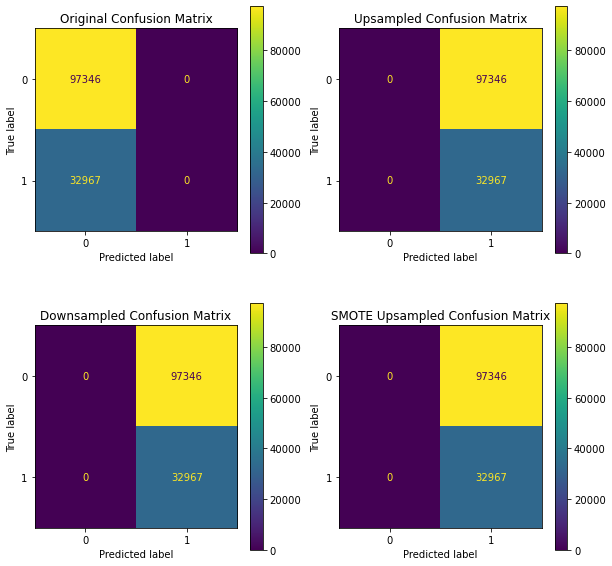


Original data classification report: 
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     97346
           1       0.00      0.00      0.00     32967

    accuracy                           0.75    130313
   macro avg       0.37      0.50      0.43    130313
weighted avg       0.56      0.75      0.64    130313


Upsampled data classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     97346
           1       0.25      1.00      0.40     32967

    accuracy                           0.25    130313
   macro avg       0.13      0.50      0.20    130313
weighted avg       0.06      0.25      0.10    130313


Downsampled data classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     97346
           1       0.25      1.00      0.40     32967

    accuracy                           0.25    130313
   m

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Model on the original data
plot_confusion_matrix(LR_model_1, X_validation, y_validation, ax=axes[0, 0])
axes[0, 0].set_title("Original Confusion Matrix")

plot_confusion_matrix(LR_model_2, X_validation, y_validation, ax=axes[0, 1])
axes[0, 1].set_title("Upsampled Confusion Matrix")

# Model on the upsampled data
plot_confusion_matrix(LR_model_4, X_validation, y_validation, ax=axes[1, 0])
axes[1, 0].set_title('Downsampled Confusion Matrix')

plot_confusion_matrix(LR_model_6, X_validation, y_validation, ax=axes[1, 1])
axes[1, 1].set_title('SMOTE Upsampled Confusion Matrix')

plt.show()

print_line = "\n=======================================================\n"

# Classification Reports
print("\nOriginal data classification report:", print_line, report_original)
print("\nUpsampled data classification report:", print_line, report_up)
print("\nDownsampled data classification report:", print_line, report_down)
print("\nSMOTE Upsampled data classification report:", print_line, report_smote)

All the sampling techniques improved the model's precision, recall and f1-scores for Class 1, albeit at the cost of predicting Class 0. 


## Next Steps
In the next notebook (Notebook 5 Logistic Regression) I will create pipelines for Logistic Regression and tune the hyperparameters and check the results for each data set again. 

---